In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [33]:
df = pd.read_csv("train.csv")

In [34]:
print("First 5 rows of the dataset:")
print(df.head())
print("\n Dataset info:")
print(df.info())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

# **1. Data Wrangling**

In [35]:
# Check missing values
print("\n Missing values:")
print(df.isnull().sum())


 Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [36]:
# Fill missing in 'Age' with median
df["Age"].fillna(df["Age"].median(), inplace=True)

/tmp/ipython-input-3373950034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [37]:
# Fill missing in'Embarked' with the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-501953626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [38]:
# Drop 'Cabin' because it's too many missing values
df.drop(columns=["Cabin"], inplace=True)

In [39]:
print("\n Missing values after cleaning:")
print(df.isnull().sum())


 Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **2. Univariate Analysis**

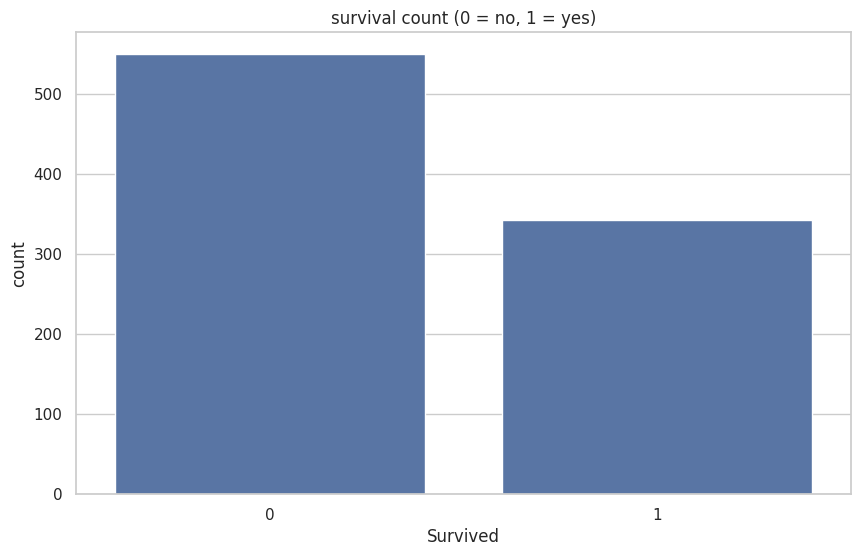

In [40]:
# Count of survival
sns.countplot(data=df, x='Survived')
plt.title("survival count (0 = no, 1 = yes)")
plt.show()

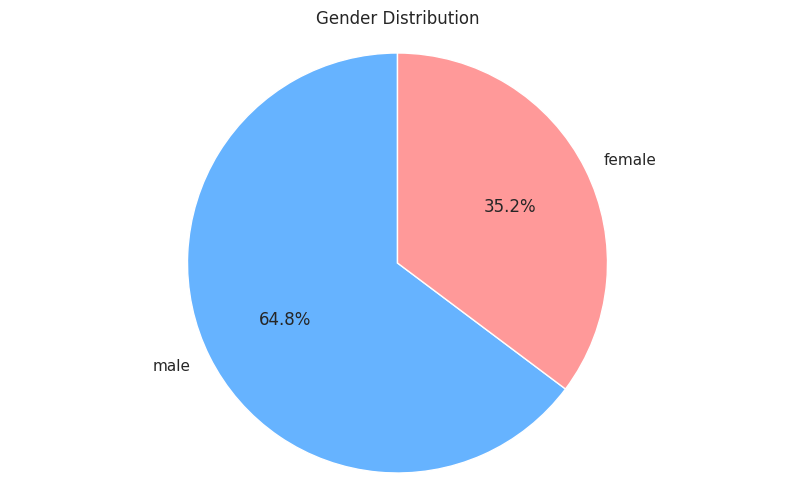

In [41]:
# gender distribution
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

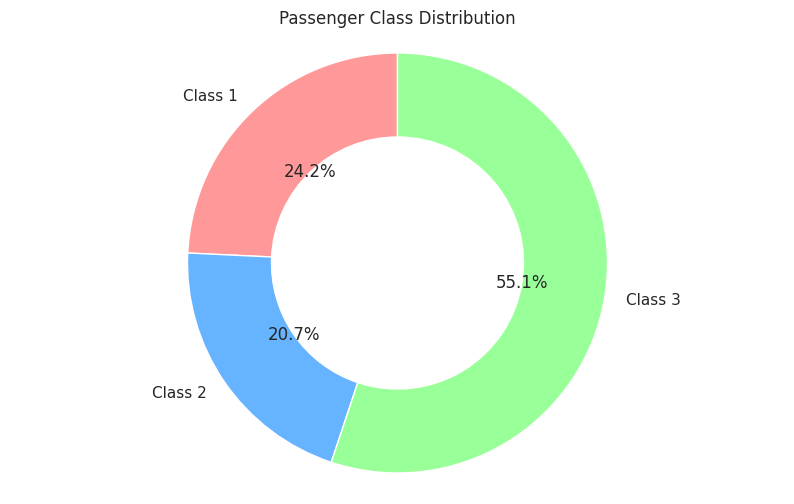

In [42]:
# passenger class distribution
class_counts = df['Pclass'].value_counts().sort_index()
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(class_counts, labels=[f"Class {i}" for i in class_counts.index], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Passenger Class Distribution")
plt.axis('equal')
plt.show()

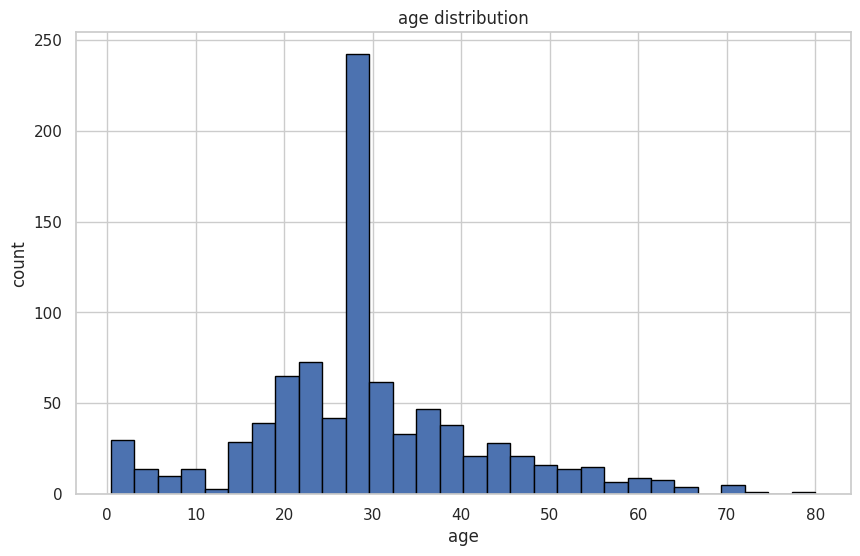

In [43]:
# histogram of age
df["Age"].hist(bins=30, edgecolor='black')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

# **3. Bivariate Analysis**

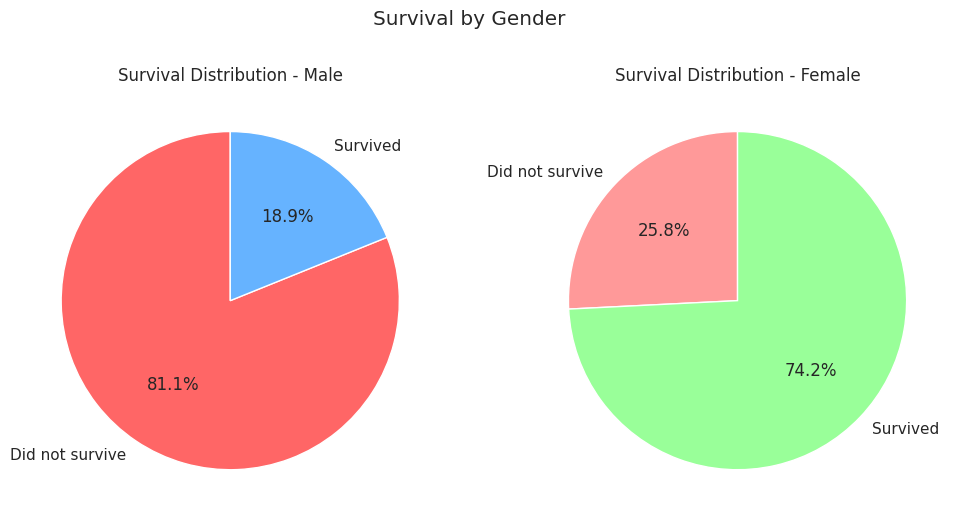

In [44]:
# survival by gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

genders = ['male', 'female']
colors = [['#ff6666', '#66b3ff'], ['#ff9999', '#99ff99']]

for i, gender in enumerate(genders):
    data = df[df['Sex'] == gender]['Survived'].value_counts().sort_index()
    axes[i].pie(data, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=colors[i])
    axes[i].set_title(f"Survival Distribution - {gender.capitalize()}")

plt.suptitle("Survival by Gender")
plt.show()

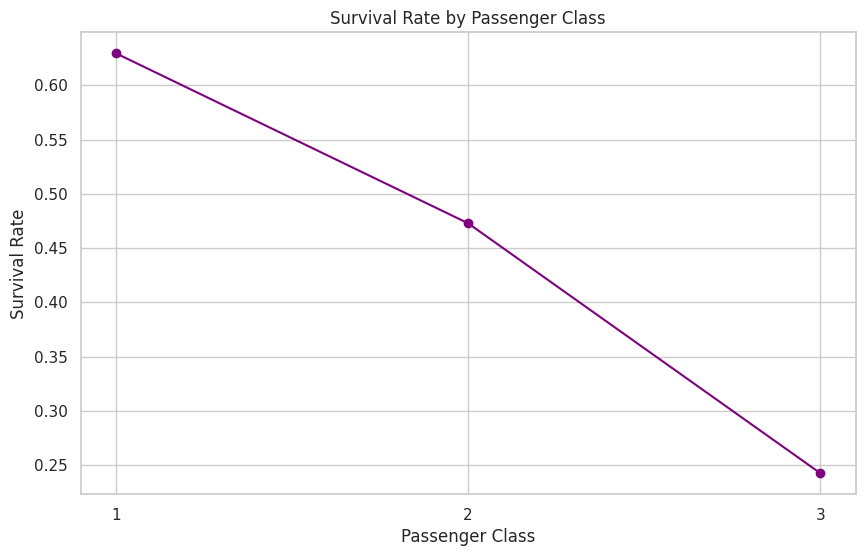

In [45]:
# survival by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

plt.plot(survival_by_class.index, survival_by_class.values, marker='o', linestyle='-', color='purple')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks([1, 2, 3])
plt.grid(True)
plt.show()

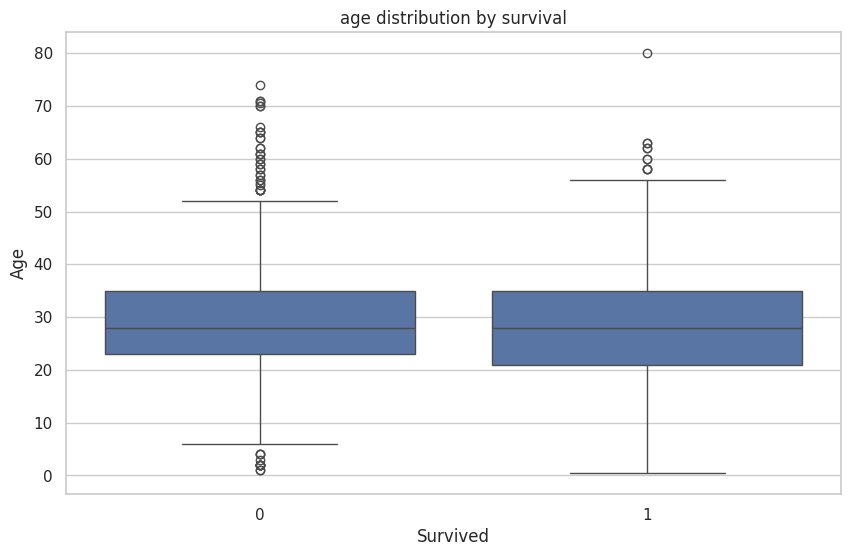

In [46]:
# age vs survival
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("age distribution by survival")
plt.show()

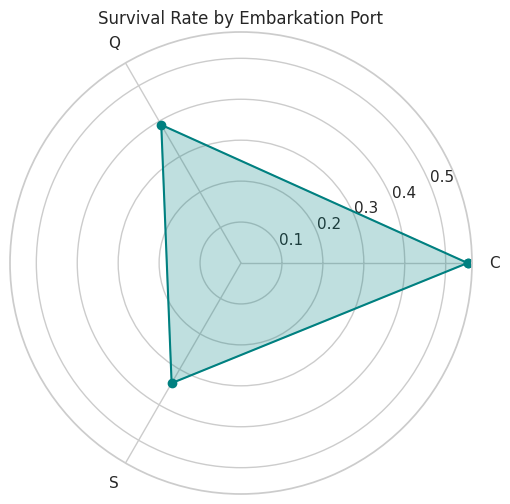

In [47]:
#سurvival by ثmbarkation حort
survival_by_port = df.groupby('Embarked')['Survived'].mean()
labels = survival_by_port.index
values = survival_by_port.values


angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = values.tolist()
values += values[:1]
angles += angles[:1]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', marker='o')
ax.fill(angles, values, color='teal', alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Survival Rate by Embarkation Port")
plt.show()

In [48]:
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("\n survival rate by class and gender:")
print(grouped)


 survival rate by class and gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


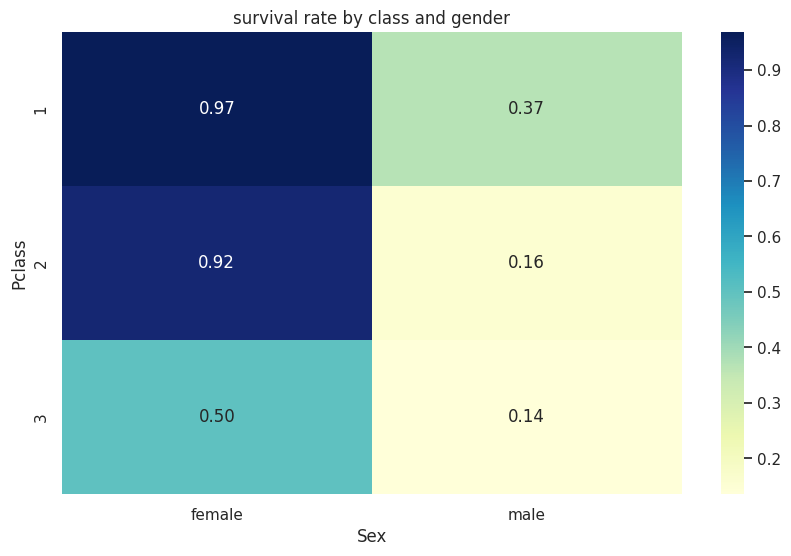

In [49]:
# Heatmap of survival rate
sns.heatmap(grouped, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("survival rate by class and gender")
plt.ylabel("Pclass")
plt.xlabel("Sex")
plt.show()

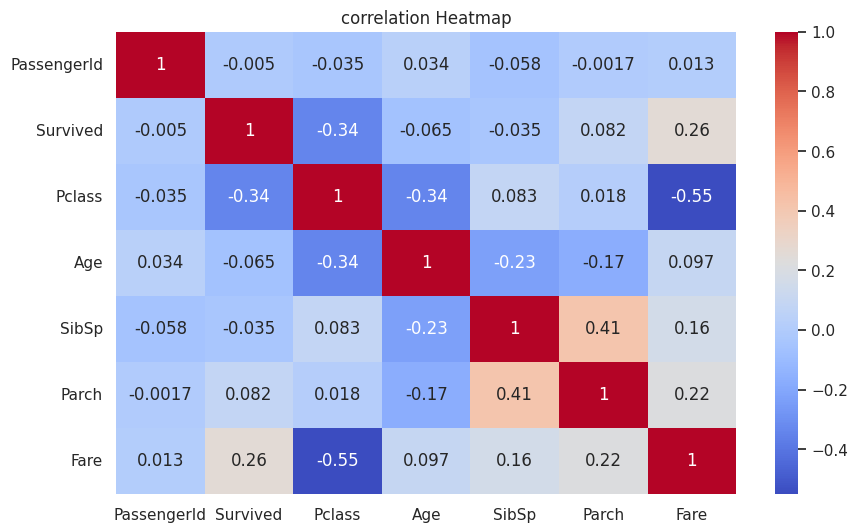

In [50]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

# **Outcomes:**

The analysis reveals several key factors influencing survival on the Titanic. Females, particularly those in higher passenger classes (1 and 2), were significantly more likely to survive, indicating a prioritization of women and upper-class individuals during evacuation efforts. While the age distribution shows that most passengers were young adults (ages 20–40), survival does not appear to be heavily age-dependent, as reflected in the similar age medians of survivors and non-survivors. Passenger class played a major role, with third-class passengers experiencing much lower survival rates, likely due to restricted access to lifeboats or less attention during rescue operations. In terms of embarkation, passengers from Port S had mixed survival outcomes, whereas those from Port Q had the fewest survivors, which may relate to differences in available resources or boarding timing. Finally, the negative correlation between 'Pclass' and 'Survived' confirms that being in a higher class increased the likelihood of survival, and the positive correlation between 'SibSp' and 'Parch' suggests that passengers traveling with families may have been prioritized, especially if children were present.